**SPAM EMAIL DETECTION**

IMPORTING NECESSARY LIBRARIES AND DATASET

In [ ]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df=pd.read_csv('/content/Spam email detection.zip',encoding='ISO-8859-1')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.dtypes

Category    object
Message     object
dtype: object

In [ ]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

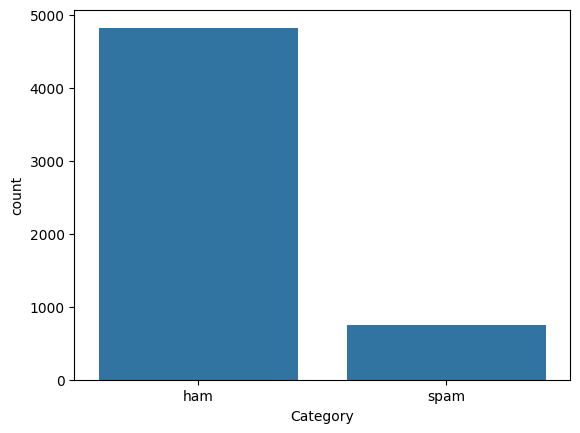

In [ ]:
sns.countplot(x='Category',data=df)

In [ ]:
df['Category']=df['Category'].map({'ham':1,'spam':0})
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ã¼ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


NLP STEPS

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
tweets=df.Message
tweets

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ã¼ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

TOKENIZATION

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
tweets

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568              Will Ã ¼ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: Message, Length: 5572, dtype: object

REMOVE SPECIAL CHARACTERS

In [ ]:
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweets

<ipython-input-141-243a49c37bfd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')


0       Go until jurong point crazy Available only in ...
1                                Ok lar Joking wif u oni 
2       Free entry in 2 a wkly comp to win FA Cup fina...
3            U dun say so early hor U c already then say 
4       Nah I don t think he goes to usf he lives arou...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                   Will b going to esplanade fr home 
5569    Pity was in mood for that So any other suggest...
5570    The guy did some bitching but I acted like i d...
5571                            Rofl Its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
tweets

0       until jurong point crazy Available only bugis ...
1                                      lar Joking wif oni
2       Free entry wkly comp win Cup final tkts 21st M...
3                      dun say early hor already then say
4         Nah don think goes usf lives around here though
                              ...                        
5567    This the 2nd time have tried contact have won ...
5568                            Will going esplanade home
5569         Pity was mood for that any other suggestions
5570    The guy did some bitching but acted like inter...
5571                               Rofl Its true its name
Name: Message, Length: 5572, dtype: object

STEMMING

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0       until jurong point crazi avail onli bugi great...
1                                        lar joke wif oni
2       free entri wkli comp win cup final tkts 21st m...
3                      dun say earli hor alreadi then say
4           nah don think goe usf live around here though
                              ...                        
5567    this the 2nd time have tri contact have won th...
5568                                will go esplanad home
5569             piti was mood for that ani other suggest
5570    the guy did some bitch but act like interest b...
5571                                 rofl it true it name
Name: Message, Length: 5572, dtype: object

In [ ]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
tweets

0       jurong point crazi avail onli bugi great world...
1                                        lar joke wif oni
2       free entri wkli comp win cup final tkts 21st m...
3                           dun say earli hor alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri contact 750 pound prize claim eas...
5568                                     go esplanad home
5569                                piti mood ani suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

VECTORIZATION

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(tweets)
train_data

<5572x6885 sparse matrix of type '<class 'numpy.float64'>'
	with 44122 stored elements in Compressed Sparse Row format>

In [ ]:
train_data.shape

(5572, 6885)

In [ ]:
print(train_data)

  (0, 6579)	0.20216031597468262
  (0, 999)	0.36596689778277197
  (0, 2952)	0.16965264899544422
  (0, 1758)	0.3091703141145051
  (0, 1531)	0.3493549619752681
  (0, 6747)	0.24533301256575607
  (0, 2989)	0.2017861574399963
  (0, 1533)	0.3091703141145051
  (0, 4474)	0.1750991615757075
  (0, 1183)	0.2737313043998896
  (0, 1957)	0.2834161703187832
  (0, 4767)	0.24988993515576846
  (0, 3543)	0.36596689778277197
  (1, 4472)	0.5884936620961707
  (1, 6673)	0.46469076328470776
  (1, 3512)	0.494457003144156
  (1, 3675)	0.4396020657733696
  (2, 70)	0.26961406544295236
  (2, 1070)	0.1919355645505515
  (2, 5025)	0.18542681454450735
  (2, 6321)	0.14233815390204066
  (2, 5773)	0.22578140384429926
  (2, 4982)	0.1893353125177682
  (2, 5062)	0.18542681454450735
  (2, 766)	0.25346248369348356
  :	:
  (5567, 4650)	0.23275121270305701
  (5567, 5025)	0.24602192076488918
  (5567, 4474)	0.17929202107361064
  (5568, 2473)	0.782681381846728
  (5568, 2914)	0.43953417232463426
  (5568, 3189)	0.4407034897404325
  (5

SEPARATING INPUT AND OUTPUT VALUES

In [ ]:
x=train_data
x

<5572x6885 sparse matrix of type '<class 'numpy.float64'>'
	with 44122 stored elements in Compressed Sparse Row format>

In [ ]:
y=df['Category'].values
y

array([1, 1, 0, ..., 1, 1, 1])

SPLIT DATA INTO TRAINING AND TESTING DATA

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

<3900x6885 sparse matrix of type '<class 'numpy.float64'>'
	with 31062 stored elements in Compressed Sparse Row format>

In [ ]:
x_test

<1672x6885 sparse matrix of type '<class 'numpy.float64'>'
	with 13060 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_test

array([1, 1, 1, ..., 1, 0, 1])

HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
param={'n_neighbors':[3,5,7,9],'weights':['uniform','distance']}
gd=GridSearchCV(clf,param,cv=10,scoring='accuracy')
gd.fit(x_train,y_train)
print(gd.best_params_)

{'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3,weights='distance')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

PERFORMANCE EVALUATION

[[ 116  108]
 [   0 1448]]


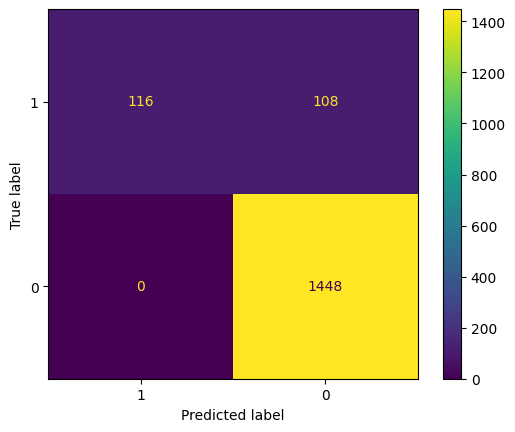

In [ ]:
label=[1,0]
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
mat=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(mat,display_labels=label)
print(mat)
dis.plot()


In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.9354066985645934

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.52      0.68       224
           1       0.93      1.00      0.96      1448

    accuracy                           0.94      1672
   macro avg       0.97      0.76      0.82      1672
weighted avg       0.94      0.94      0.93      1672



MODEL CREATION USING LOGISTIC REGRESSION,

RANDOM FOREST CLASSIFIER, ADABOOSTING CLASSIFIER & THEIR PERFORMANCE EVALUATION

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
dtc=DecisionTreeClassifier(max_depth=1)
abc=AdaBoostClassifier(base_estimator=dtc,n_estimators=50)
abc.fit(x_train,y_train)
y_pred1=abc.predict(x_test)
y_pred1

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
mat1=confusion_matrix(y_test,y_pred1)
mat1

array([[ 182,   42],
       [  10, 1438]])

In [ ]:
score1=accuracy_score(y_test,y_pred)
score1

0.9354066985645934

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,criterion='entropy')
lr=LogisticRegression(solver='saga',max_iter=100,class_weight='balanced')

In [ ]:
lst=[rfc,lr]
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_predict=i.predict(x_test)
  print(confusion_matrix(y_test,y_predict))
  print(accuracy_score(y_test,y_predict))
  print(classification_report(y_test,y_predict))
  print("*"*100)

RandomForestClassifier(criterion='entropy')
[[ 186   38]
 [   0 1448]]
0.9772727272727273
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       224
           1       0.97      1.00      0.99      1448

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672

****************************************************************************************************
LogisticRegression(class_weight='balanced', solver='saga')
[[ 204   20]
 [  20 1428]]
0.9760765550239234
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       224
           1       0.99      0.99      0.99      1448

    accuracy                           0.98      1672
   macro avg       0.95      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672

**************************************************